In [1]:
from preprocessing import *
from main import *
import os
import shutil
if os.path.exists('model'):
    shutil.rmtree("model")

In [2]:
# set your device and visible devices, prefer cuda
os.environ["CUDA_VISIBLE_DEVICES"]="2"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'DEVICE: {device}')

# set your parameters based on hyperparameter tuning results
htgr_best = {'depth': 3, 'grid': 5, 'k': 4, 'lamb': 2.63584570163326e-06, 'lamb_entropy': 3.02497466094173, 'lr_1': 0.75, 'lr_2': 1.5, 'steps': 75}

# load your dataset from preprocessing
dataset = get_htgr(cuda=True)

DEVICE: cuda


In [3]:
# define your NKAN object
htgr_kan = NKAN(dataset, 42, device, htgr_best)

checkpoint directory created: ./model
saving model version 0.0


In [4]:
# initialize and train your model
model = htgr_kan.get_model(save=True, save_as='HTGR_best')

description:   0%|                                                           | 0/75 [00:00<?, ?it/s]

| train_loss: 1.30e-02 | test_loss: 1.53e-02 | reg: 3.86e+01 | : 100%|█| 75/75 [00:30<00:00,  2.44it


saving model version 0.1
Model trained.
saving model version 0.2


| train_loss: 1.27e-02 | test_loss: 1.39e-02 | reg: 2.51e+01 | : 100%|█| 75/75 [00:34<00:00,  2.18it

saving model version 0.3
Model pruned and re-trained.


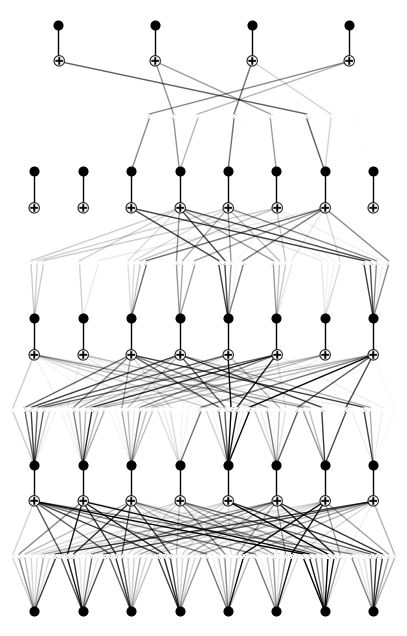

In [5]:
model.plot()

In [6]:
htgr_kan.get_metrics(model, 'HTGR_best')

,OUTPUT,MAE,MAPE,MSE,RMSE,RMSPE,R2
0,fluxQ1,0.0003,0.1110,0.0,0.0003,0.1381,0.9932
1,fluxQ2,0.0003,0.1153,0.0,0.0004,0.1452,0.9925
2,fluxQ3,0.0003,0.1121,0.0,0.0004,0.1420,0.9928
3,fluxQ4,0.0003,0.1112,0.0,0.0004,0.1400,0.9930


In [7]:
# do a quick refinement loop on your model 
#chf_kan.refine(model, grids=[15, 20, 30, 50])

In [ ]:
htgr_kan.get_equation(model, 'HTGR_best_s0', simple=0, metrics=True)

fixing (0,0,0) with cos, r2=0.9990126092847201, c=2
fixing (0,0,1) with gaussian, r2=0.9971271218492892, c=3
fixing (0,0,2) with sin, r2=0.9827848588126951, c=2
fixing (0,0,3) with abs, r2=0.9714224359276912, c=3
fixing (0,0,4) with sin, r2=0.9442645918837888, c=2
fixing (0,0,5) with cos, r2=0.9554115661415601, c=2
fixing (0,0,6) with gaussian, r2=0.9333554373762457, c=3
fixing (0,0,7) with gaussian, r2=0.9986352022648095, c=3
fixing (0,1,0) with arctan, r2=0.9910346596279628, c=4
fixing (0,1,1) with gaussian, r2=0.9991697357963581, c=3
fixing (0,1,2) with sin, r2=0.9988371545898237, c=2
fixing (0,1,3) with gaussian, r2=0.9160176192438892, c=3
fixing (0,1,4) with gaussian, r2=0.9614724536352528, c=3
fixing (0,1,5) with sin, r2=0.9804317263383066, c=2
fixing (0,1,6) with abs, r2=0.894984500631915, c=3
fixing (0,1,7) with sin, r2=0.9031655409236713, c=2
fixing (0,2,0) with sin, r2=0.9974009945381492, c=2
fixing (0,2,1) with gaussian, r2=0.9959456703287431, c=3
fixing (0,2,2) with cos, r2

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f33040a86a0>>
Traceback (most recent call last):
  File "/home/npanczyk/miniconda3/envs/pykan-env/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


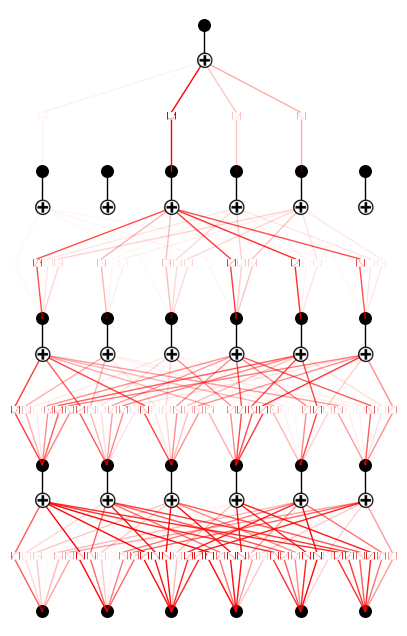

In [ ]:
model.plot()